In [2]:
import get_waveforms
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client('IRIS')
# Searless Valley Earthquake 5.5
t = UTCDateTime('2021-06-03T01:32:11.000')

starttime = t-1800
endtime = t+ 1800

net = 'CI'
sta = 'USC'
loc = '*'
channel = ['HHE','HHN', 'HHZ']
windowlength = 300

In [ ]:
st_e = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[0], starttime=starttime,
                            endtime=endtime, attach_response=True)

st_n = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[1], starttime=starttime,
                    endtime=endtime, attach_response=True)

st_z = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[2], starttime=starttime,
                    endtime=endtime, attach_response=True)

In [ ]:
st_e.remove_response(output='ACC')
st_n.remove_response(output='ACC')
st_z.remove_response(output='ACC')




In [ ]:
import os
import numpy as np
path = r'C:\University of Southern California Education\Research\HVSR\RStudio'

try:
    os.chdir(path)
except FileExistsError:
    pass

txtfile_dir = path

network_east = st_e[0].stats.network
sta_east = st_e[0].stats.station
deast = np.float(st_e[0].stats.delta)
pts_east = st_e[0].stats.npts
time = np.dot(range(pts_east), deast)

amp_e = st_e[0].data

data_e = np.concatenate((time, amp_e), axis = 0)


data_e = data_e.reshape(pts_east, 2)


year = st_e[0].stats.starttime._get_year()

component_e = st_e[0].stats.channel


In [ ]:
f_name = f'_{t}' + f'_{network_east}' + f'_{component_e}' + '.txt'

In [ ]:
f_name

In [ ]:
np.savetxt('ew_test.txt', data_e, fmt = '%f')

In [ ]:
dnorth = np.float(st_n[0].stats.delta)
pts_north = st_n[0].stats.npts
time = np.dot(range(pts_north), dnorth)

amp_n = st_n[0].data

data_n = np.concatenate((time, amp_n), axis = 0)
data_n = data_n.reshape(pts_north, 2)
np.savetxt('ns_test.txt', data_n, fmt = '%f')




dvt = np.float(st_n[0].stats.delta)
pts_vt = st_n[0].stats.npts
time = np.dot(range(pts_vt), dvt)

amp_vt = st_z[0].data

data_vt = np.concatenate((time, amp_vt), axis = 0)
data_vt = data_vt.reshape(pts_vt, 2)

np.savetxt('vt_test.txt', data_vt, fmt = '%f')



In [3]:
t = UTCDateTime('2014-09-03T10:10:00.000')
client = Client('SCEDC')
net = 'CI'
sta = 'DRE'
loc = '*'
channel = ['HHE', 'HHN', 'HHZ']


st_e = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[0], starttime=t- 1800,
                            endtime=t+1800, attach_response=True)

st_n = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[1], starttime=t - 1800,
                    endtime=t+1800, attach_response=True)

st_z = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[2], starttime=t-1800,
                    endtime=t+1800, attach_response=True)

In [4]:
import sigpropy
st_e.merge()
st_n.merge()
st_z.merge()

ew = sigpropy.TimeSeries(st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(st_z.traces[0].data, dt = st_z[0].stats.delta)

In [7]:
import hvsrpy
# hvsr10 = hvsrpy.Sensor3c(ew=st_e, ns=st_n, vt=st_z, meta=None)
# hvsr20 = hvsrpy.Sensor3c(ew=st_e, ns=st_n, vt=st_z, meta=None)
hvsr40 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr80 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr200 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr300 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr400 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr800 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)



'''Parameters to create hvsr object'''

# windowlength = 40

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.
filter_bool = False        
# Low-cut frequency for bandpass filter.
filter_flow = 0.03                  
# High-cut frequency for bandpass filter.
filter_fhigh = 30                   
# Filter order.
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1


"""FREQUENCY DOMAIN SETTING"""

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40

# Minimum frequency after resampling
resample_fmin = 0.03
# Maximum frequency after resampling
resample_fmax = 50
# Number of frequencies after resampling
resample_fnum = 200
# Type of resampling {'log', 'linear'}
resample_type = 'log'

# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None

"""HVSR Settings"""
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"



# wi_10 = hvsr10.hv(windowlength=10, bp_filter = bp_filter, taper_width = width,
#               bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

# wi_20 = hvsr20.hv(windowlength=20, bp_filter = bp_filter, taper_width = width,
#               bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

# wi_40 = hvsr40.hv(windowlength=40, bp_filter = bp_filter, taper_width = width,
#               bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

# wi_80 = hvsr80.hv(windowlength=80, bp_filter = bp_filter, taper_width = width,
#                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_200 = hvsr200.hv(windowlength=200, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_300 = hvsr300.hv(windowlength=300, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_400 = hvsr400.hv(windowlength=400, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_800 = hvsr800.hv(windowlength=800, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)


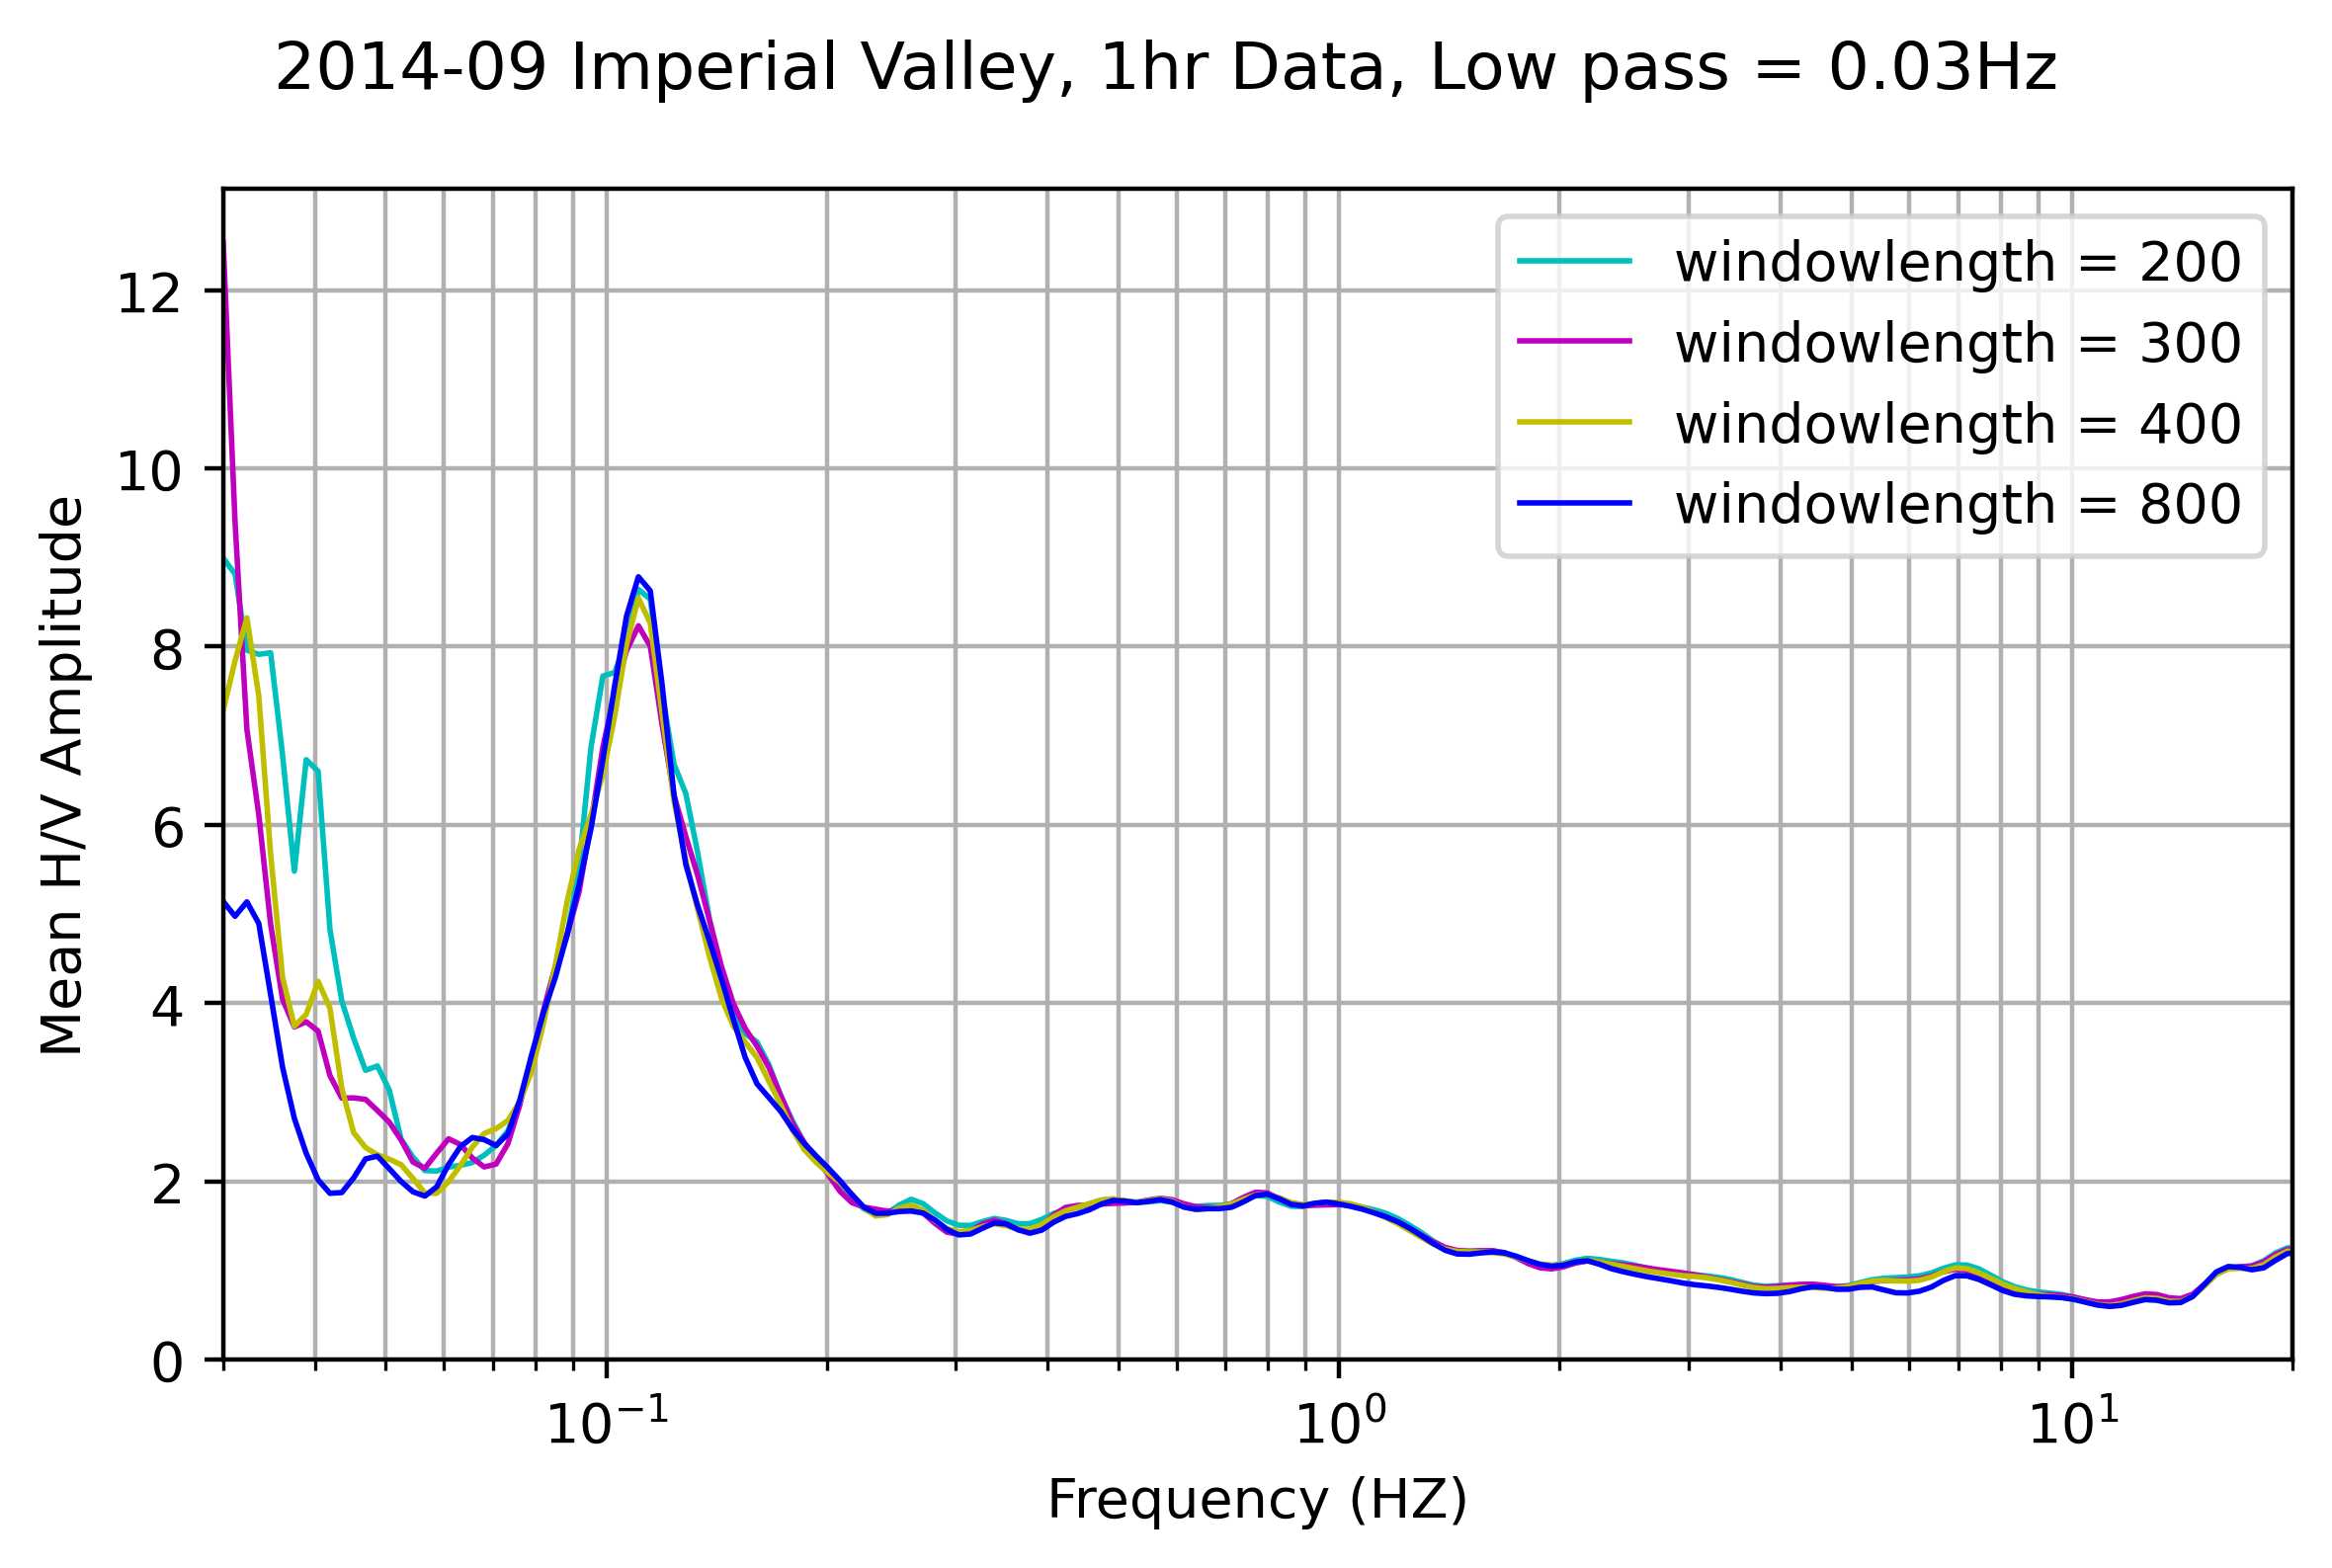

In [15]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(dpi=400)

# ax.plot(usc_noridge_hvsr.frq, usc_noridge_hvsr.amp, color='c', linewidth=0.5)
'''Ignore 0 division'''
np.seterr(invalid='ignore')


# for amp in usc_noridge_hvsr.amp:
#     ax.plot(usc_noridge_hvsr.frq, amp, color='#888888', linewidth=0.3)
#     label = None

# ax.plot(wi_40.frq, wi_40.mean_curve(distribution="lognormal"), color='k', linewidth=1, label='windowlength = 40')
# ax.plot(wi_80.frq, wi_80.mean_curve(distribution="lognormal"), color='r', linewidth=1, label='windowlength = 80')
ax.plot(wi_200.frq, wi_200.mean_curve(distribution="normal"), color='c', linewidth=1, label='windowlength = 200')
ax.plot(wi_300.frq, wi_300.mean_curve(distribution="normal"), color='m', linewidth=1, label='windowlength = 300')
ax.plot(wi_400.frq, wi_400.mean_curve(distribution="normal"), color='y', linewidth=1, label='windowlength = 400')
ax.plot(wi_800.frq, wi_800.mean_curve(distribution="normal"), color='b', linewidth=1, label='windowlength = 800')



    
# ax.plot([usc_noridge_hvsr.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")

ax.legend()
# Setting axis scale

ax.set_xlim(0.03, 20)


ax.set_xscale('log')
ax.set_yscale('linear')

# Setting axes title
ax.set_xlabel('Frequency (HZ)')
ax.set_ylabel('Mean H/V Amplitude')
fig.suptitle("2014-09 Imperial Valley, 1hr Data, Low pass = 0.03Hz")

# ax.plot([usc_noridge_hvsr.mean_f0_frq('lognormal')]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
plt.grid(which='both', axis='both')


fname = 'C:/University of Southern California Education/Research/HVSR/Figures/RC_71_2hrData.jpg'
plt.tight_layout()

plt.savefig(fname = fname, dpi=600, bbox_inches='tight')

plt.show()